In [1]:
import numpy as np
import pinocchio as pin
from comparer2 import Comparer
from IPython.display import clear_output

In [2]:
# velocity_list = ["10", "15", "20", "25"]
velocity_list = ["10", "15", "20", "25", "30", "35", "40", "45", "50", "55", "60", "65", "70"]
default_base = "575"
default_slope = "00"
default_comWeight = "1000"

comp = Comparer(
    slope_list=[round(float(default_slope)*1e-4, 5)],
    base_list=[round(float(default_base)*1e-3, 5)],
    velocity_list=[round(float(velocity)*1e-2, 5) for velocity in velocity_list[0]],
    comWeight_list=[round(float(default_comWeight)*1e-3, 5)]
)
clear_output(wait=False)

In [3]:
comp.logs = {}
comp.names = []
v = velocity_list[0]
for velocity in velocity_list:
    path = f"../results/finals/varying_velocity_{default_base}/walk_slope_{default_slope}_comWeight_{default_comWeight}_vel_{velocity}"
    comp.add_log(
        path=f"{path}/closed.npy",
        robot_type="closed",
        name=f"velocity_{velocity}_result",
        s=round(float(default_slope)*1e-4, 5),
        b=round(float(default_base)*1e-3, 5),
        v=round(float(v)*1e-2, 5),
        w=int(default_comWeight)
        )
    comp.add_log(
        path=f"{path}/closed_ws.npy",
        robot_type="closed",
        name=f"velocity_{velocity}_warmstart",
        s=round(float(default_slope)*1e-4, 5),
        b=round(float(default_base)*1e-3, 5),
        v=round(float(v)*1e-2, 5),
        w=int(default_comWeight)
        )
    # comp.add_log(
    #     path=f"{path}/closed_warmstarted.npy",
    #     robot_type="closed",
    #     name=f"velocity_{velocity}_warmstarted",
    #     s=round(float(default_slope)*1e-4, 5),
    #     b=round(float(default_base)*1e-3, 5),
    #     v=round(float(v)*1e-2, 5),
    #     w=int(default_comWeight)
    #     )
    # comp.add_log(
    #     path=f"{path}/closed_warmstarted_ws.npy",
    #     robot_type="closed",
    #     name=f"velocity_{velocity}_warmstarted_ws",
    #     s=round(float(default_slope)*1e-4, 5),
    #     b=round(float(default_base)*1e-3, 5),
    #     v=round(float(v)*1e-2, 5),
    #     w=int(default_comWeight)
    # )
    # comp.add_log(
    #     path=f"{path}/closed_warmstarted_warmstarted.npy",
    #     robot_type="closed",
    #     name=f"velocity_{velocity}_warmstarted_warmstarted",
    #     s=round(float(default_slope)*1e-4, 5),
    #     b=round(float(default_base)*1e-3, 5),
    #     v=round(float(v)*1e-2, 5),
    #     w=int(default_comWeight)
    # )

comp.printNames()

Load "../results/finals/varying_velocity_575/walk_slope_00_comWeight_1000_vel_10/closed.npy"!
Load "../results/finals/varying_velocity_575/walk_slope_00_comWeight_1000_vel_10/closed_ws.npy"!
Load "../results/finals/varying_velocity_575/walk_slope_00_comWeight_1000_vel_15/closed.npy"!
Load "../results/finals/varying_velocity_575/walk_slope_00_comWeight_1000_vel_15/closed_ws.npy"!
Load "../results/finals/varying_velocity_575/walk_slope_00_comWeight_1000_vel_20/closed.npy"!
Load "../results/finals/varying_velocity_575/walk_slope_00_comWeight_1000_vel_20/closed_ws.npy"!
Load "../results/finals/varying_velocity_575/walk_slope_00_comWeight_1000_vel_25/closed.npy"!
Load "../results/finals/varying_velocity_575/walk_slope_00_comWeight_1000_vel_25/closed_ws.npy"!
Load "../results/finals/varying_velocity_575/walk_slope_00_comWeight_1000_vel_30/closed.npy"!
Load "../results/finals/varying_velocity_575/walk_slope_00_comWeight_1000_vel_30/closed_ws.npy"!
Load "../results/finals/varying_velocity_575/

/local/usr/ldematteis/Repositories/Software_LAAS_INRIA/sobec/examples/walk_without_think/trajectory_comparisons/comparer2.py:177: UserWarning: n_iter not found in the log velocity_10_warmstart, setting it to -1
  warn(f"n_iter not found in the log {name}, setting it to -1")
/local/usr/ldematteis/Repositories/Software_LAAS_INRIA/sobec/examples/walk_without_think/trajectory_comparisons/comparer2.py:177: UserWarning: n_iter not found in the log velocity_15_warmstart, setting it to -1
  warn(f"n_iter not found in the log {name}, setting it to -1")
/local/usr/ldematteis/Repositories/Software_LAAS_INRIA/sobec/examples/walk_without_think/trajectory_comparisons/comparer2.py:177: UserWarning: n_iter not found in the log velocity_20_warmstart, setting it to -1
  warn(f"n_iter not found in the log {name}, setting it to -1")
/local/usr/ldematteis/Repositories/Software_LAAS_INRIA/sobec/examples/walk_without_think/trajectory_comparisons/comparer2.py:177: UserWarning: n_iter not found in the log velo

In [4]:
# ids = (np.array([0, 1])+5*8).tolist()
name = comp.names[0]
xs = comp.logs[name]["xs"]
T = len(xs)
comp.setFigsize((15, 10))
comp.setTimeHorizon([0, 150])

comp.computeAllCosts()

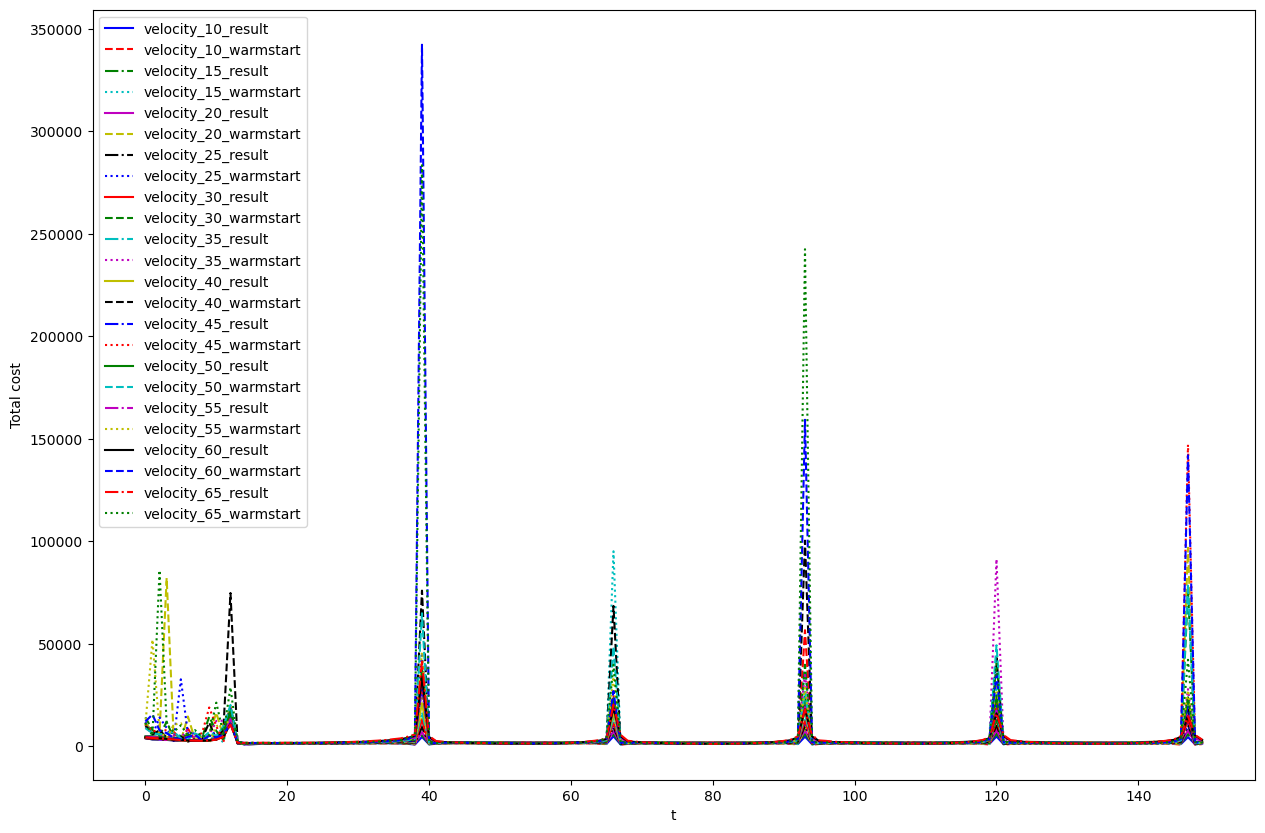

In [5]:
ids = [i for i in range(len(comp.names))]
comp.compareTotalCosts(ids=ids[:-2])

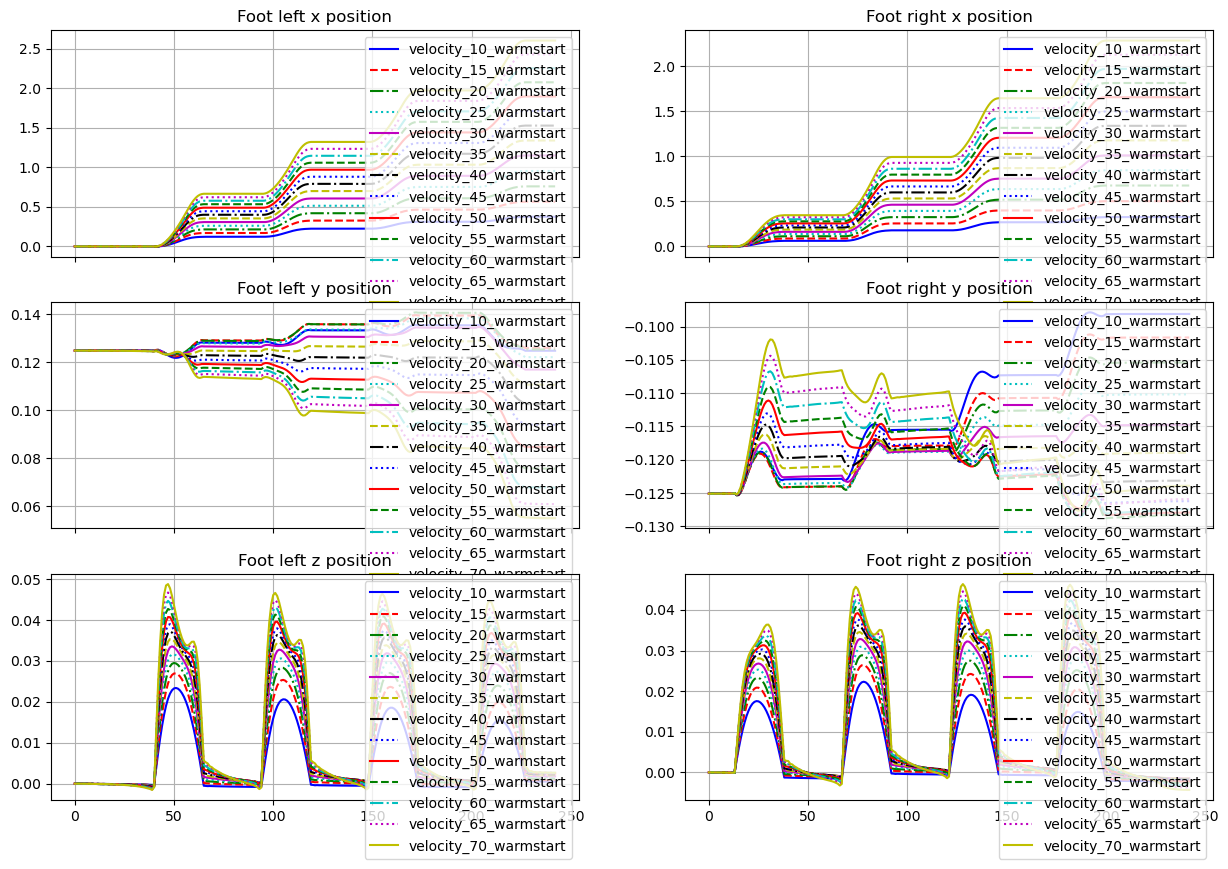

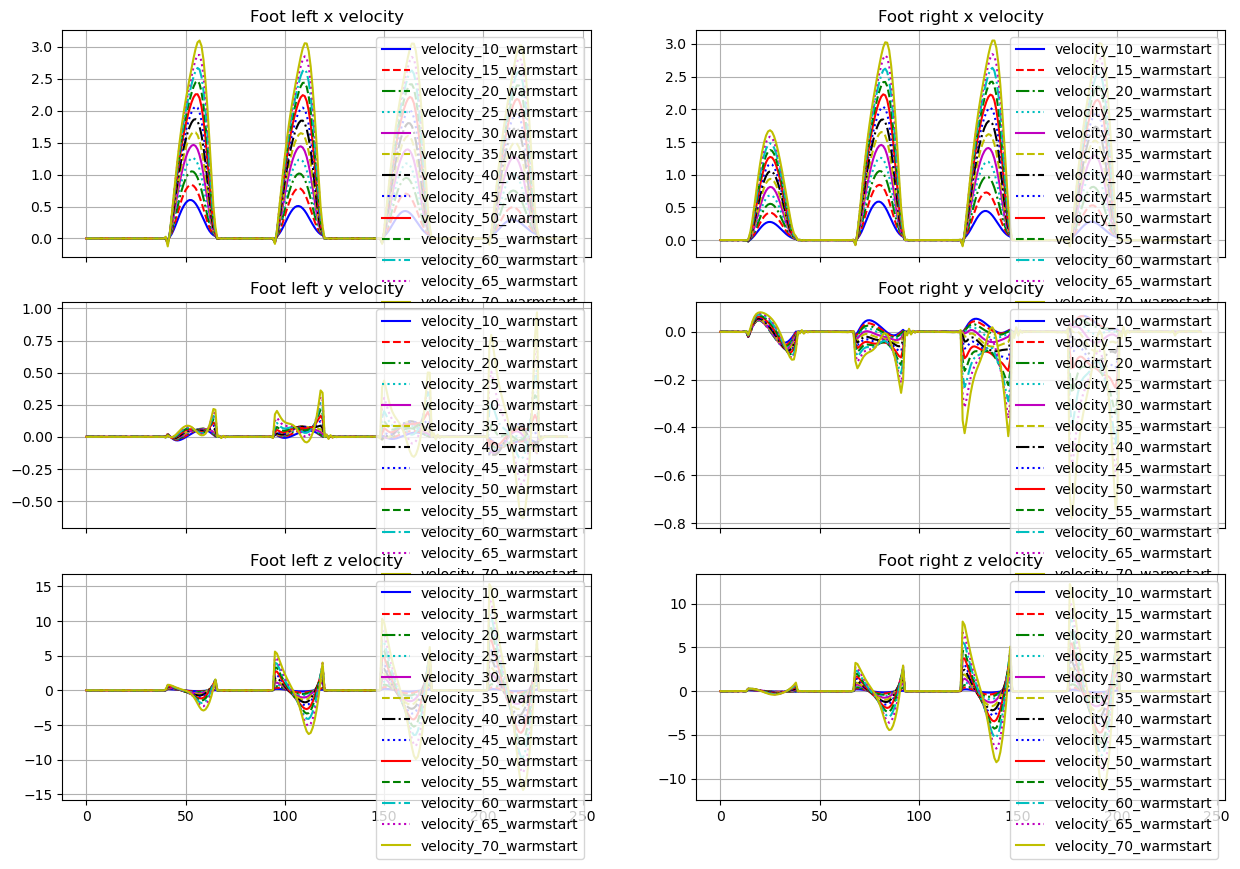

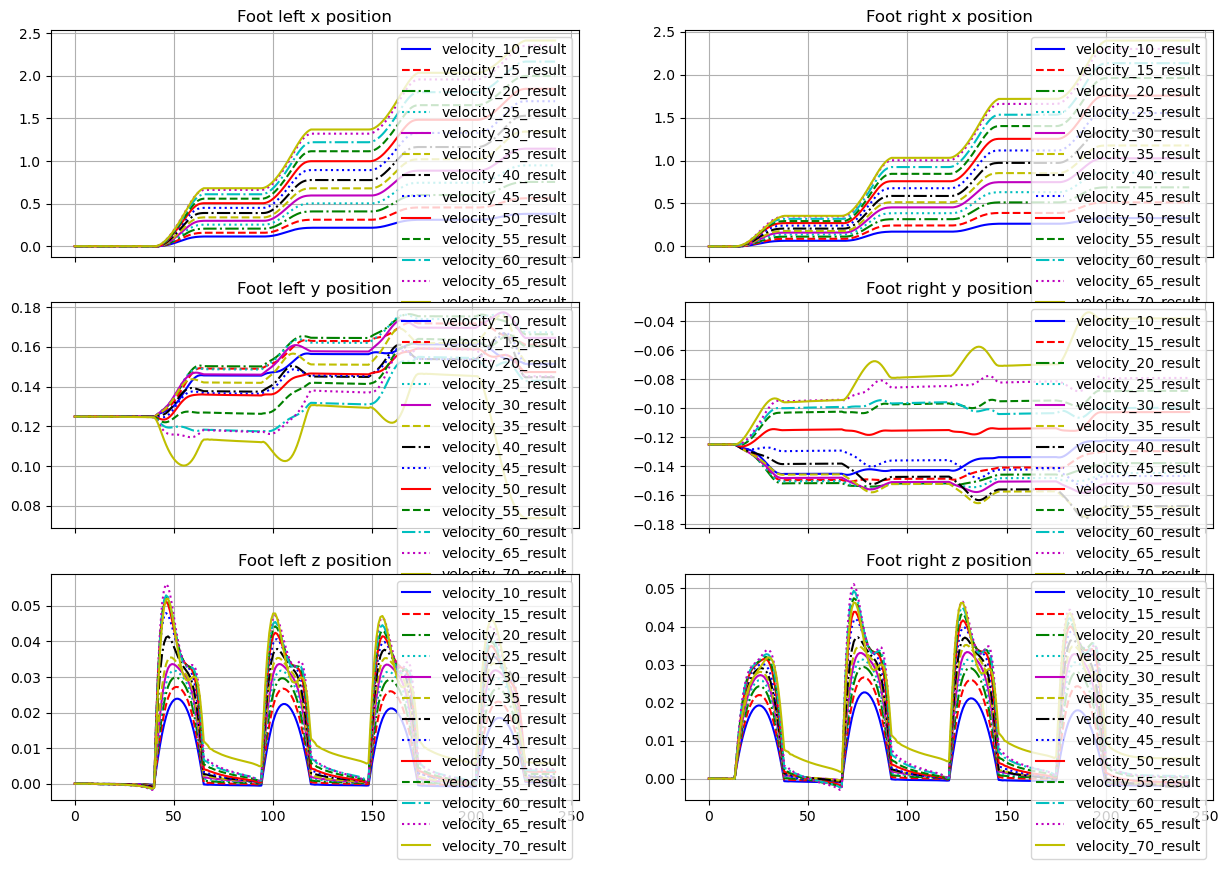

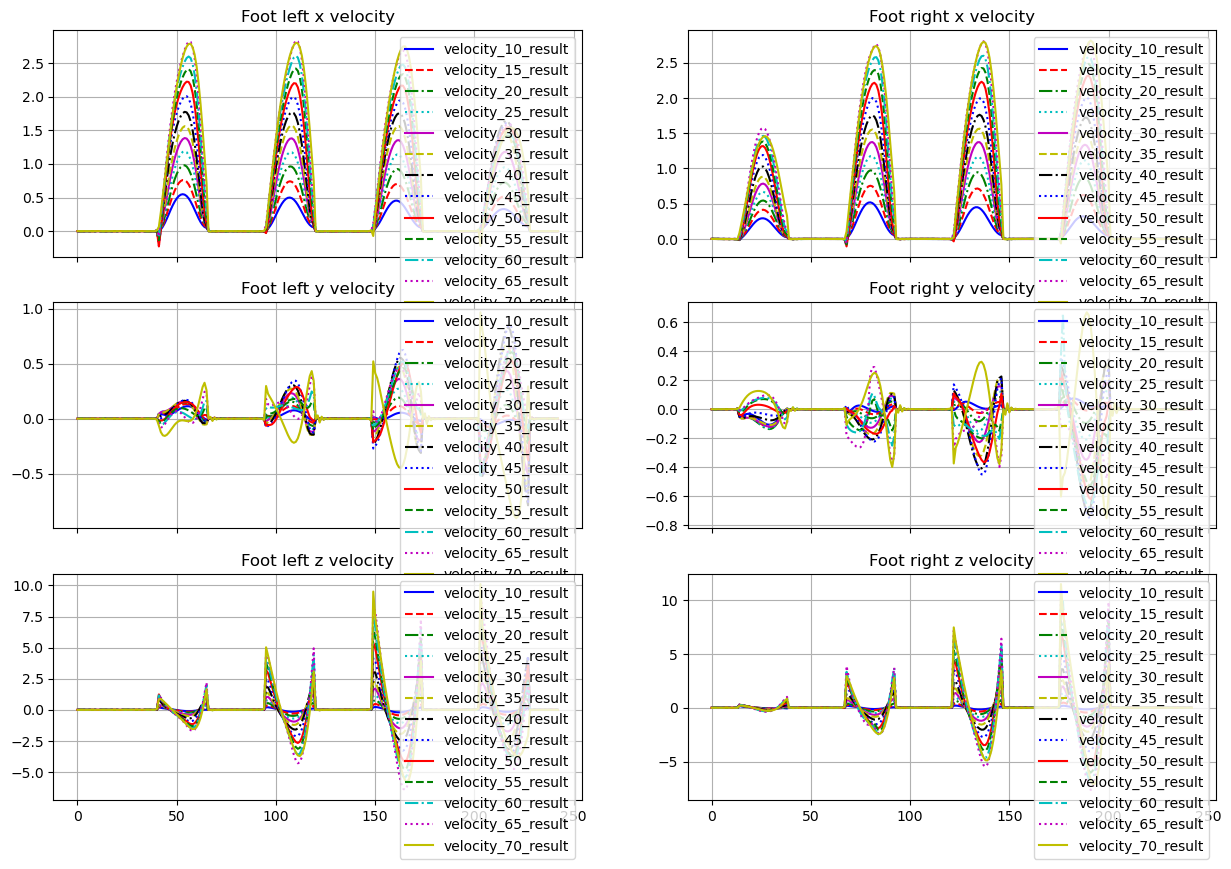

In [6]:
comp.computeAllFootTrajectories()
ids_closed = [0+i*2 for i in range(len(velocity_list))]
ids_open = [1+i*2 for i in range(len(velocity_list))]
comp.setFigsize((15, 10))
comp.setTimeHorizon([0, T])
comp.plotFootTrajectory(ids=ids_open)
comp.plotFootTrajectory(ids=ids_closed)

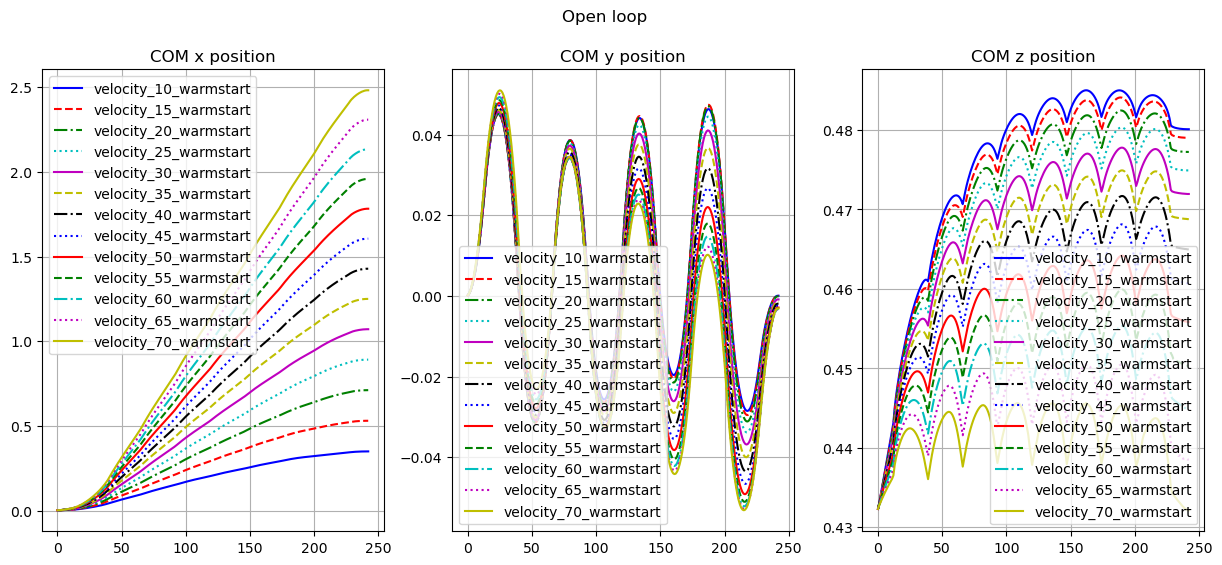

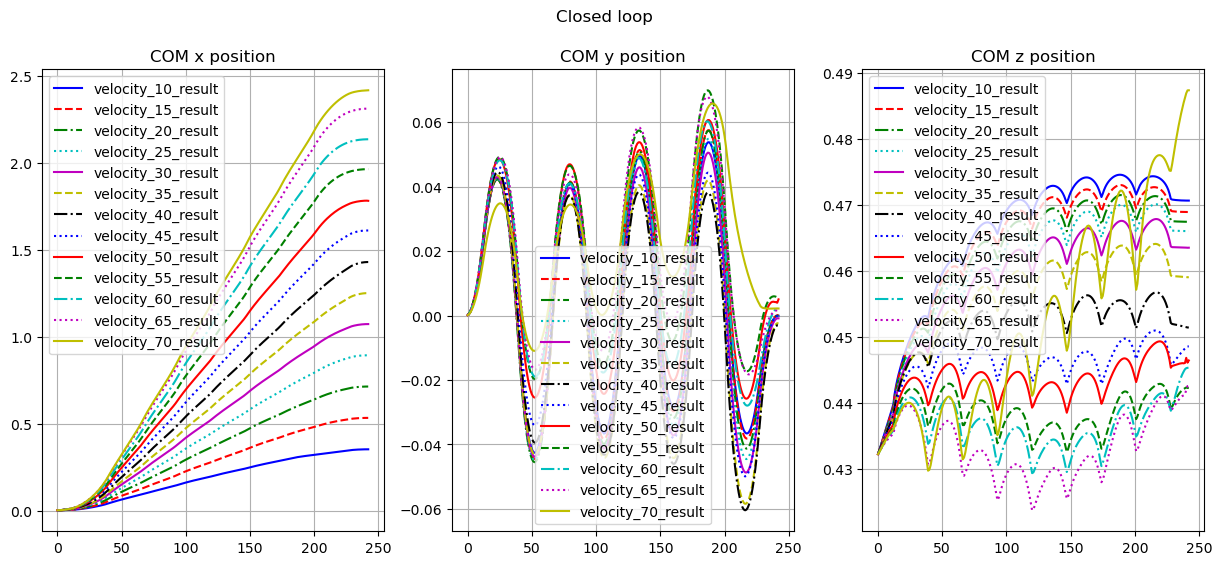

In [7]:
comp.computeAllCOMTrajectories()
comp.setFigsize((15, 6))
comp.plotCOMTrajectory(ids=ids_open, title="Open loop", velocity=False)
comp.plotCOMTrajectory(ids=ids_closed, title="Closed loop", velocity=False)

In [8]:
# n_cases = len(velocity_list)
# ids = []
# labels = []
# for i in range(1, n_cases):
#     ids.append(i*5)
#     ids.append(i*5+1)
#     labels.append(f"vel_{velocity_list[i]}")
# print(labels)
# comp.plotCOMDiff(ids=ids, title="COM Difference for different velocity", labels=labels, velocity=False)
# comp.plotCOMXYDiff(ids=ids)

In [9]:
print("%%%%%%%% Computing viable trajectories %%%%%%%%")
ids_failed = []
names_failed = []
ids_succeed = []
names_succeed = []
for id_o in ids_open:
    name = comp.names[id_o]
    if (np.abs(comp.logs[name]["us"][0:T]) < 1e3).all():
        ids_succeed.append(id_o)
        names_succeed.append(name)
    else:
        ids_failed.append(id_o)
        names_failed.append(name)
print("Failed cases")
print(names_failed)
print(ids_failed)
print("Sucessful cases")
print(names_succeed)
print(ids_succeed)

%%%%%%%% Computing viable trajectories %%%%%%%%
Failed cases
['velocity_55_warmstart', 'velocity_65_warmstart', 'velocity_70_warmstart']
[19, 23, 25]
Sucessful cases
['velocity_10_warmstart', 'velocity_15_warmstart', 'velocity_20_warmstart', 'velocity_25_warmstart', 'velocity_30_warmstart', 'velocity_35_warmstart', 'velocity_40_warmstart', 'velocity_45_warmstart', 'velocity_50_warmstart', 'velocity_60_warmstart']
[1, 3, 5, 7, 9, 11, 13, 15, 17, 21]


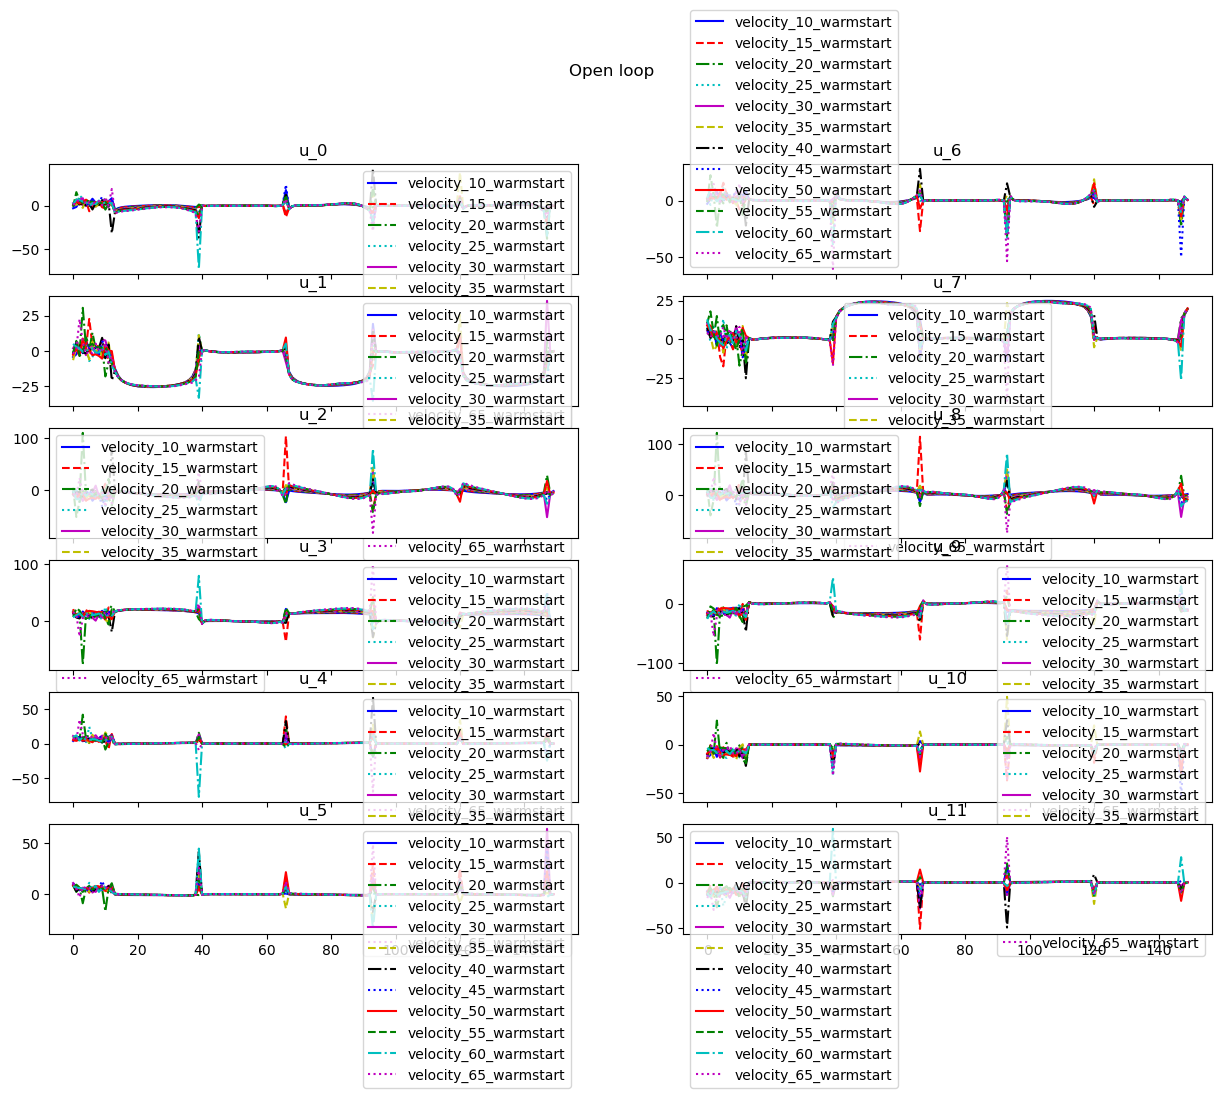

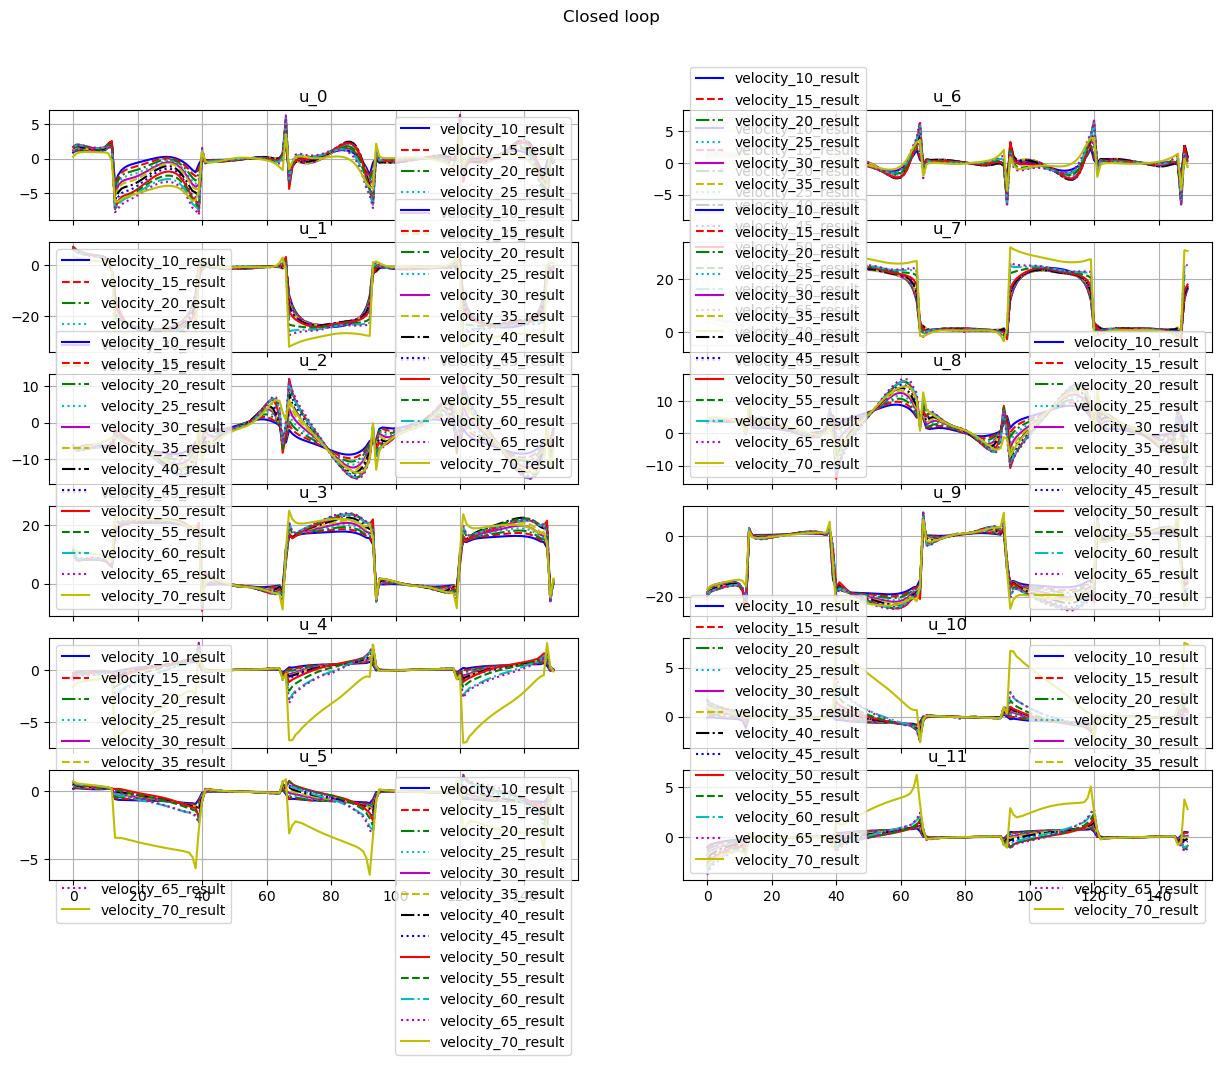

In [10]:
comp.setFigsize((15, 10))
comp.setTimeHorizon([0, 150])
comp.plotControls(ids=ids_open[:-1], title="Open loop")
comp.plotControls(ids=ids_closed[:], title="Closed loop")

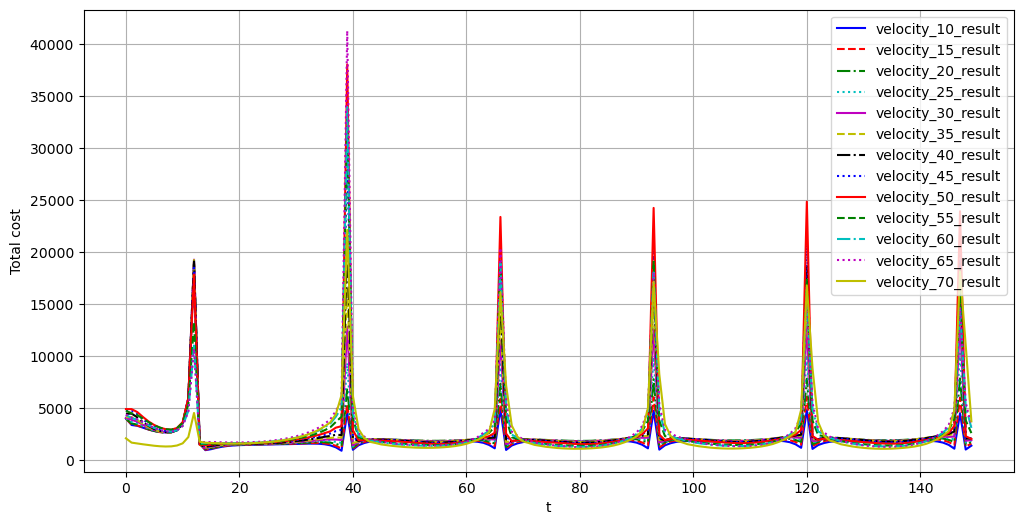

In [11]:
comp.setFigsize((12, 6))
comp.compareTotalCosts(ids=ids_closed)

/local/usr/ldematteis/Repositories/Software_LAAS_INRIA/sobec/examples/walk_without_think/trajectory_comparisons/comparer2.py:462: UserWarning: No keys specified, plotting all costs
  warn("No keys specified, plotting all costs")


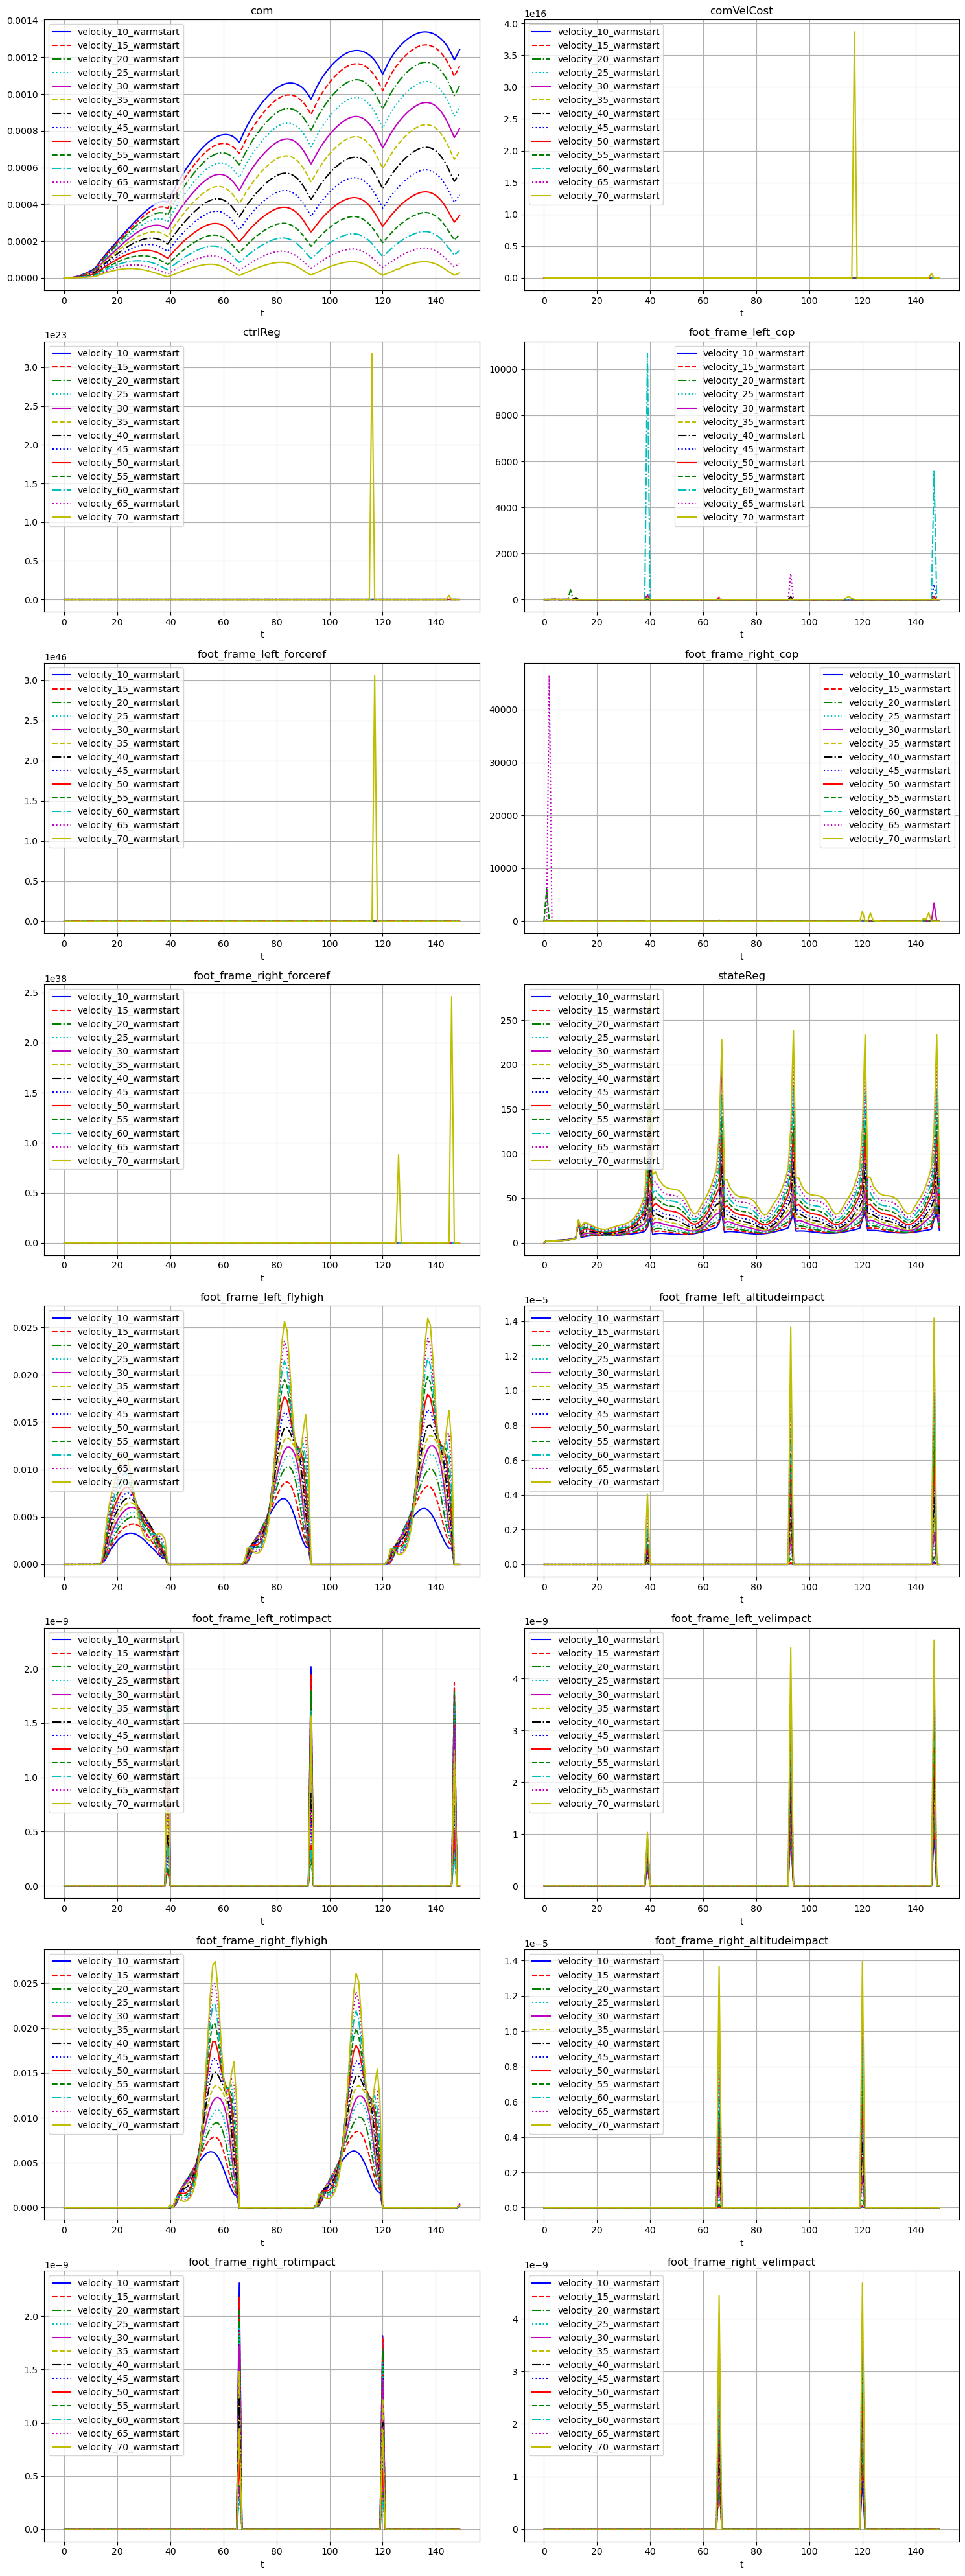

In [12]:
comp.setFigsize((15, 40))
comp.compareRunningCosts(ids=ids_open)

In [13]:
# ids = [5*8, 5*8+1]
# comp.setFigsize((15, 6))
# comp.plotCOMTrajectory(ids=ids, title="Reference Trajectory COM", velocity=False)
# comp.plotFootTrajectory(ids=ids, title="Reference Trajectory Foot")
# comp.plotControls(ids=ids, title="Reference Trajectory Controls")

# Create proper figures to show in the paper

In [14]:
print(ids_open)
print(ids_closed)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]


### Showing center of mass height variation

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

sns.set_palette("colorblind")
matplotlib.rcParams.update({'font.size': 20})
SMALL_SIZE = 10
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('axes', lengendsize=BIGGER_SIZE)    # fontsize of the legend
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

0.47461864024798683 0.4237825304559976


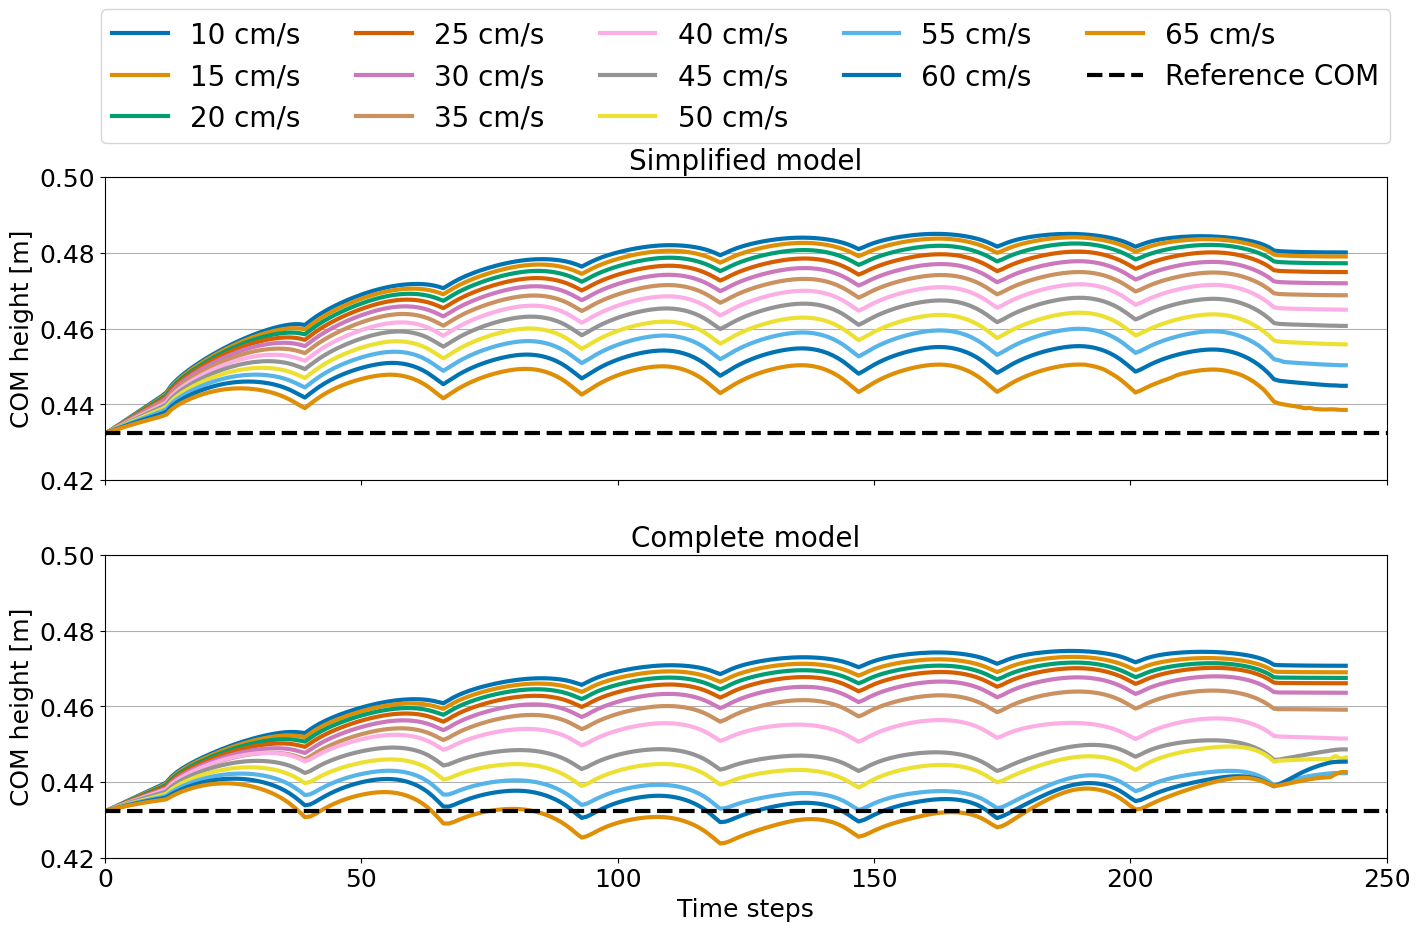

In [16]:
# Plotting the COM height for the different velocities
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
y_axis_limit = [0.42, 0.5]
x_axis_limit = [0, 250]
com0 = comp.logs[comp.names[ids_open[0]]]["com"]["position"][0][2]
com_zmax = np.max([np.max(np.array(comp.logs[comp.names[i]]["com"]["position"])[:, 2]) for i in ids_closed[:-1]])
com_zmin = np.min([np.min(np.array(comp.logs[comp.names[i]]["com"]["position"])[:, 2]) for i in ids_closed[:-1]])
print(com_zmax, com_zmin)
for n, i in enumerate(ids_open[:-1]):
    name = comp.names[i]
    com_pos = np.array(comp.logs[name]["com"]["position"])
    ax1.plot(com_pos[:, 2], label=f"{velocity_list[n]} cm/s", linewidth=3)
ax1.axhline(com0, xmin=0, xmax=1, color="k", linestyle="--", linewidth=3, label="Reference COM")
# ax1.axhline(com_zmax, xmin=0, xmax=1, color="r", linestyle="--", linewidth=2, label="Complete model extremum")
# ax1.axhline(com_zmin, xmin=0, xmax=1, color="r", linestyle="--", linewidth=2)
ax1.set_ylim(y_axis_limit)
ax1.set_xlim(x_axis_limit)
ax1.set_title("Simplified model")
ax1.grid(axis="y")
ax1.set_ylabel("COM height [m]")
ax1.legend(bbox_to_anchor=(0.5, 1.6), loc='upper center', ncols=5)

for i in ids_closed[:-1]:
    name = comp.names[i]
    com_pos = np.array(comp.logs[name]["com"]["position"])
    ax2.plot(com_pos[:, 2], linewidth=3)
ax2.axhline(com0, xmin=0, xmax=1, color="k", linestyle="--", linewidth=3)
# ax2.axhline(com_zmax, xmin=0, xmax=1, color="r", linestyle="--", linewidth=2)
# ax2.axhline(com_zmin, xmin=0, xmax=1, color="r", linestyle="--", linewidth=2)
ax2.set_ylim(y_axis_limit)
ax2.set_xlim(x_axis_limit)
ax2.set_title("Complete model")
ax2.grid(axis="y")
ax2.set_xlabel("Time steps")
ax2.set_ylabel("COM height [m]")

plt.tight_layout()
plt.savefig("/home/ldematteis/Images/ICRA_2025/results/finals/varying_vel/com_height_comparison.svg", format="svg")
plt.show()
####

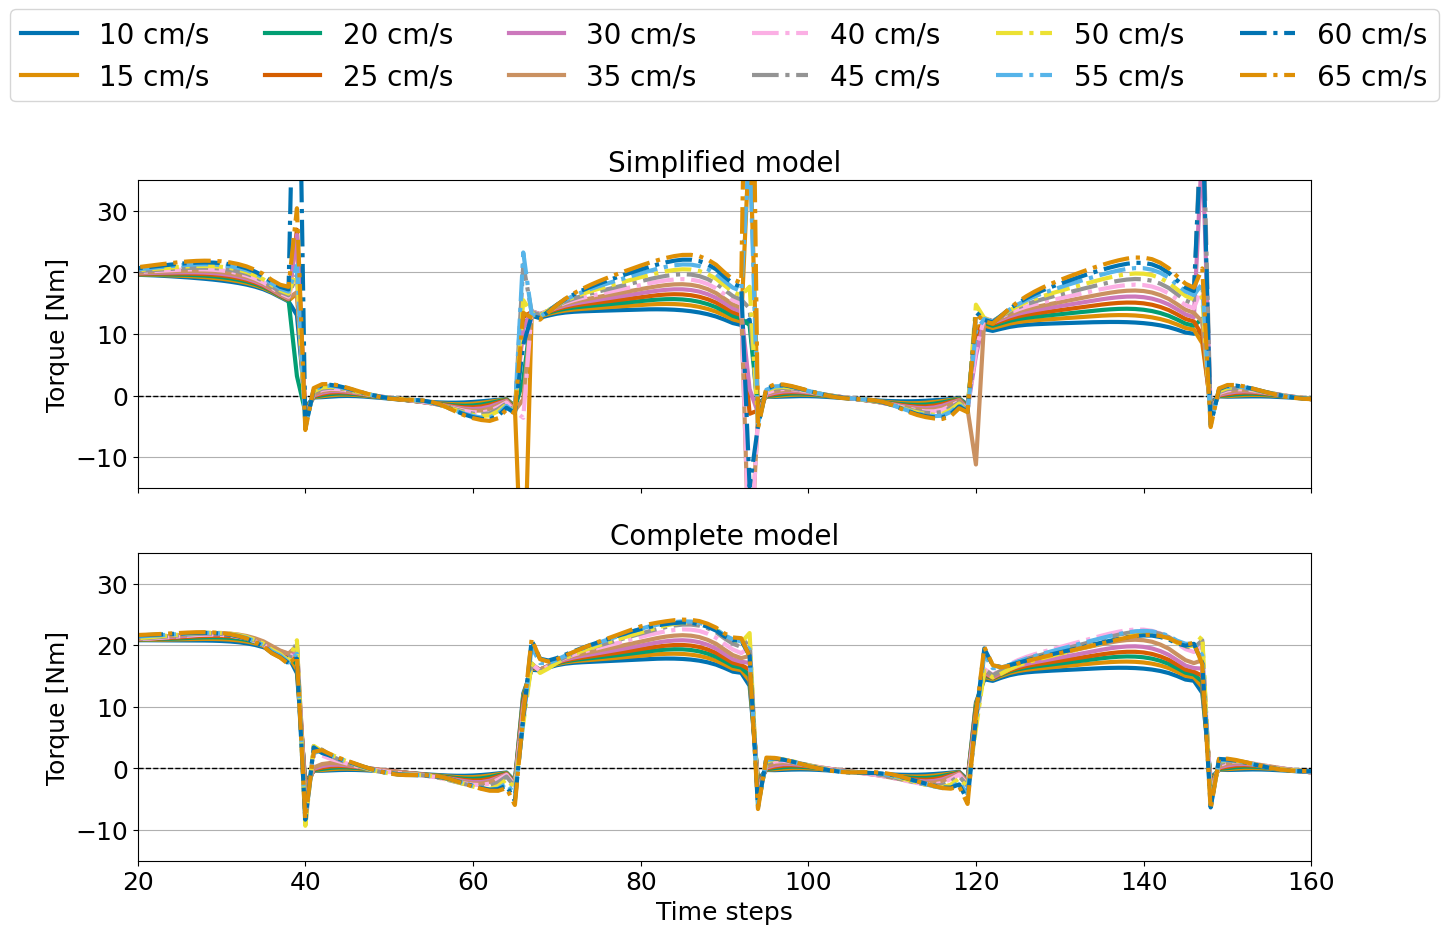

In [17]:
# Comparing controls on the knee for different velocities
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
y_axis_limit = [-15, 35]
# y_axis_limit2 = [-15, 15]
x_axis_limit = [20, 160]

ax1.axhline(0, xmin=0, xmax=1, color="k", linestyle="--", linewidth=1)
selection_open = ids_open[:-1]
for n, i in enumerate(selection_open):
    name = comp.names[i]
    controls = np.array(comp.logs[name]["us"])
    ax1.plot(controls[:, 5], label=f"{velocity_list[n]} cm/s", linewidth=3, linestyle=["-", "-."][n//6])
    # ax2.plot(controls[:, 2], label=f"{velocity_list[n]} cm/s", linewidth=3)
ax1.set_ylim(y_axis_limit)
ax1.set_xlim(x_axis_limit)
# ax2.set_ylim(y_axis_limit2)
# ax2.set_xlim(x_axis_limit)
ax1.set_title("Simplified model")
# ax2.set_title("Simplified model")
ax1.grid(axis="y")
# ax2.grid()
ax1.set_ylabel("Torque [Nm]")
ax1.legend(bbox_to_anchor=(0.5, 1.6), loc='upper center', ncols=6)

ax3.axhline(0, xmin=0, xmax=1, color="k", linestyle="--", linewidth=1)
selection_closed = ids_closed[:-1]
for n, i in enumerate(selection_closed):
    name = comp.names[i]
    controls = np.array(comp.logs[name]["us"])
    ax3.plot(controls[:, 5], linewidth=3, linestyle=["-", "-."][n//6])
    # ax4.plot(controls[:, 2], linewidth=3)
ax3.set_ylim(y_axis_limit)
ax3.set_xlim(x_axis_limit)
# ax4.set_ylim(y_axis_limit2)
# ax4.set_xlim(x_axis_limit)
ax3.set_title("Complete model")
# ax4.set_title("Complete model")
ax3.grid(axis="y")
# ax4.grid()
ax3.set_xlabel("Time steps")
# ax4.set_xlabel("Time steps")
ax3.set_ylabel("Torque [Nm]")

plt.tight_layout()
plt.savefig("/home/ldematteis/Images/ICRA_2025/results/finals/varying_vel/knee_torque_comparison.svg", format="svg")
plt.show()
####